In [1]:
from covid_lib import read_covid_data
import numpy as np
import matplotlib.pyplot as plt

from aidam.math_utils import lag_correlation_ext, moving_function_rev1
from scipy.stats import pearsonr
from aidam.aicharts import plotyy

## Lettura e preprocessing dati

In [2]:
trend,regioni,giorni,giorno_settimana,popolazione,day_counter=read_covid_data('stored_data.pkl')

Giorni osservati: 674
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2021-12-28T17:00:00


## Calcolo LAG correlation

In [11]:
max_delay=60
delays=list(range(0,max_delay))

x_name_list = ['totale_positivi', 'perc_tamponi_positivi']
y_name='nuovi_positivi'


y=trend[y_name]['Italia']

y_sm=moving_function_rev1(y,np.mean,2,2)


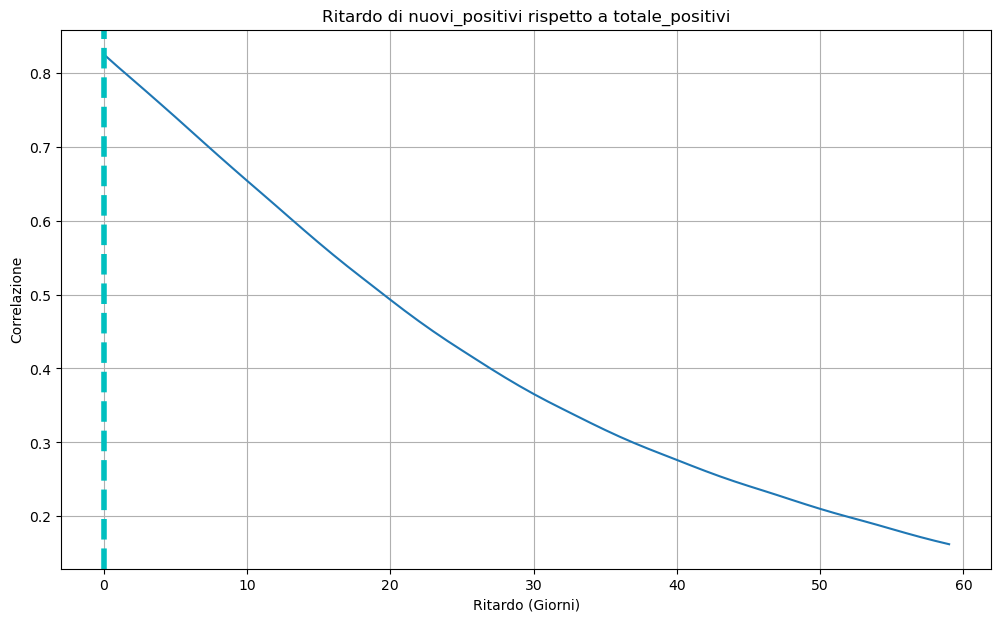

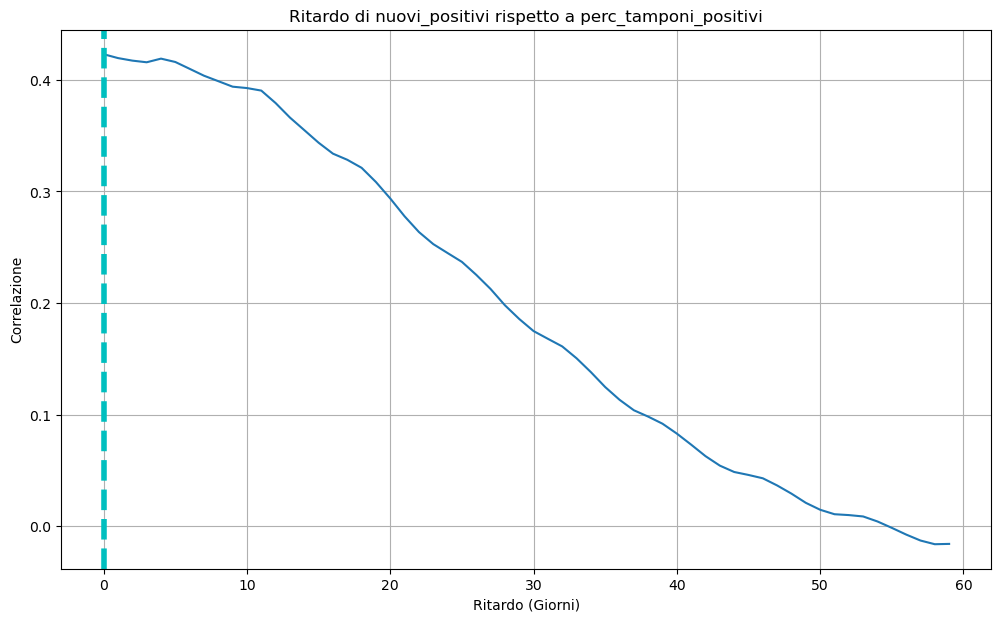

In [12]:
for x_name in x_name_list:
    x=trend[x_name]['Italia']
    if x_name=='perc_tamponi_positivi':
        x[0]=x[1]
    corrs,betas=lag_correlation_ext(x,y_sm,delays,corr_fun=pearsonr)
    max_point=np.argmax(corrs)
    
    fig,ax=plt.subplots(1,figsize=(12,7))
    ax.plot(delays,corrs,label='Correlazione')
    ax.grid()
    ax.set_xlabel('Ritardo (Giorni)')
    ax.set_ylabel('Correlazione')
    ax.set_title('Ritardo di %s rispetto a %s'%(y_name,x_name))
    ax.axvline(x=max_point,c='c', linewidth=4,ls='--')
plt.show()

In [13]:
max_point

0